# Example CIFAR100 Demo

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2light/run0_widthmult_1.4_t_6/checkpoints/records.pkl']
['/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2light/run0_widthmult_1.4_t_6/checkpoints/model.pth']


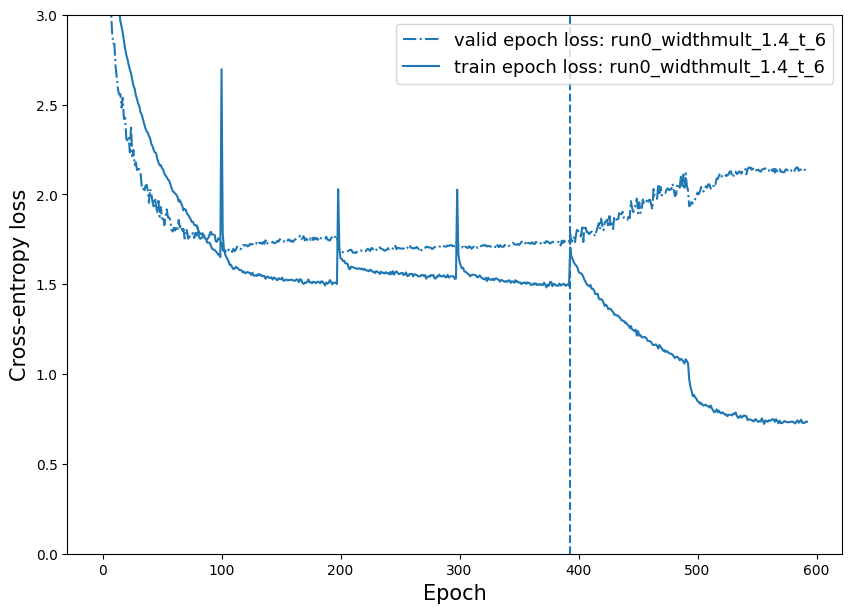

run0_widthmult_1.4_t_6: test accuracy = 58.119998931884766


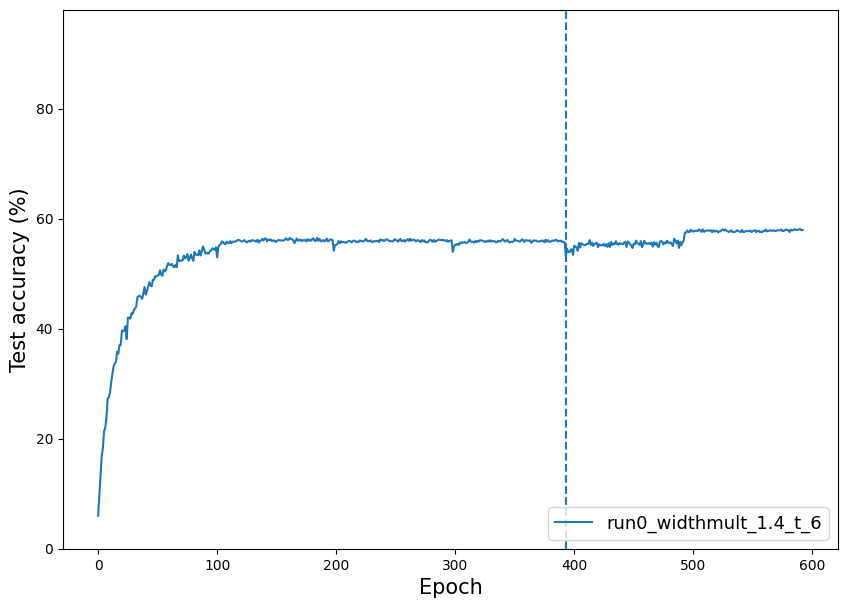

In [2]:
%matplotlib inline

# exp_dir = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/'
# exp_dir = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2tiny_conv/'
exp_dir = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2light/'
# models_list = ["debug"]
# models_list = ["run0", 'run0_widthmult_1.0', 'run0_widthmult_2.0_expansion_8_fixedConv', 'run0_widthmult_1.4_expansion_8','run0_widthmult_2.0_expansion_8_fixedConv', "run0_widthmult_1.4_t_6"]
# models_list = ['run0_widthmult_2.0_expansion_8_fixedConv']
# models_list = ['run0_widthmult_1.4_t_8']
models_list = ["run0_widthmult_1.4_t_6"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [3]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_widthmult_1.4_t_6
Number of parameters summary:
    Total: 1828881 
    Max per branch: 1755231 
    Min per branch: 1729692 
    Average per branch: 1746718.0


In [6]:
from models import Tree
from utils import load_tree_model
import ptflops

# model_path = "/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0/checkpoints/model.pth"
# model_path = "/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_1.0/checkpoints/model.pth"
# model_path = '/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2/run0_widthmult_2.0_expansion_8_fixedConv/checkpoints/model.pth'
model_path = "/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/experiments/cifar100/mbv2tiny_conv/run0_widthmult_1.4_t_8/checkpoints/model.pth"
model = load_tree_model(model_path)



flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
Tree(
  1.49 M, 100.000% Params, 37.65 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    1.49 M, 100.000% Params, 37.65 MMac, 100.000% MACs, 
    (0): Sequential(
      1.24 M, 83.239% Params, 37.49 MMac, 99.571% MACs, 
      (transform): Root_MBV2tiny(
        1.18 M, 79.048% Params, 37.41 MMac, 99.367% MACs, 
        (features): Sequential(
          1.18 M, 79.048% Params, 37.41 MMac, 99.367% MACs, 
          (0): Sequential(
            696, 0.047% Params, 552.96 KMac, 1.469% MACs, 
            (0): Conv2d(648, 0.044% Params, 497.66 KMac, 1.322% MACs, 3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(48, 0.003% Params,

/media/hongyu/SSD/SSDUBUNTU/WUSL/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
